In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [94]:
import numpy as np

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Generators:

train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [8]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


In [9]:
def process(image,labels):
  image =tensorflow.cast(image/255.,tensorflow.float32)
  return image,labels


In [10]:
train_ds = train_ds.map(process)
validation_ds =validation_ds.map(process)

In [46]:
# Model Building:

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer ='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
history = model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.5576 - loss: 3.4043 - val_accuracy: 0.6290 - val_loss: 0.6435
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.6805 - loss: 0.6096 - val_accuracy: 0.7416 - val_loss: 0.5205
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.7443 - loss: 0.5169 - val_accuracy: 0.7628 - val_loss: 0.4916
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.7891 - loss: 0.4588 - val_accuracy: 0.7564 - val_loss: 0.5061
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.8237 - loss: 0.3940 - val_accuracy: 0.7342 - val_loss: 0.5290
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8529 - loss: 0.3444 - val_accuracy: 0.7832 - val_loss: 0.5116
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8854 - loss: 0.2738 - val_accuracy: 0.7598 - val_loss: 0.6197
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9214 - loss: 0.2012 - 

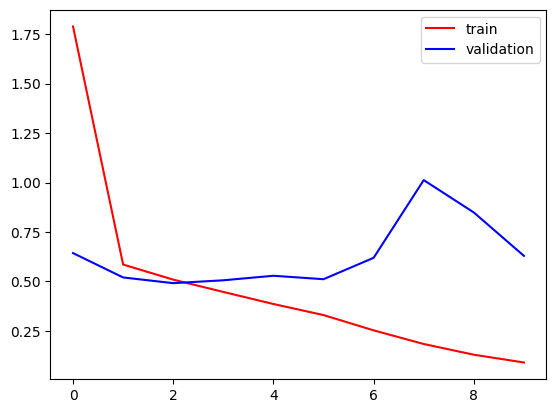

In [49]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#new model

In [38]:
import cv2

In [97]:
test_img = cv2.imread('/content/dogs_vs_cats/test/dogs/dog.10010.jpg')

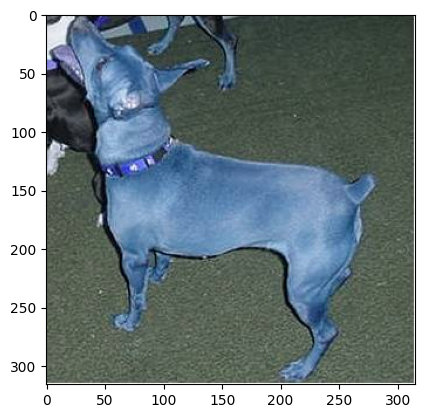

In [98]:
plt.imshow(test_img)

In [99]:
test_img.shape

(316, 315, 3)

In [100]:
test_img = cv2.resize(test_img,(256,256))

In [101]:
test_input = test_img.reshape((1,256,256,3))

In [102]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1.]], dtype=float32)

In [86]:
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10026.jpg')

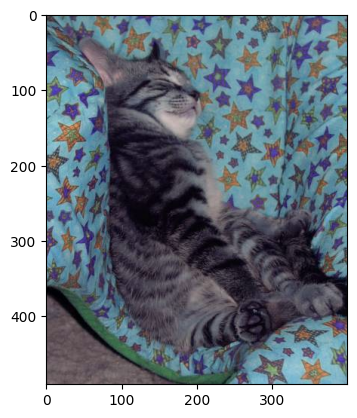

In [87]:
plt.imshow(test_img)

In [88]:
test_img.shape

(491, 400, 3)

In [89]:
test_img = cv2.resize(test_img,(256,256))

In [90]:
test_input = test_img.reshape((1,256,256,3))

In [92]:
y_pred=model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [95]:
y_pred=np.where(y_pred >0.5,1,0)

In [96]:
y_pred

array([[0]])